<a href="https://colab.research.google.com/github/Shrieejanani/Password_strenth_detection/blob/main/NLP_PASSWORD_STRENGTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# DATA COLLECTION

In [2]:
import sqlite3

In [3]:
#Create a SQL connection to sqlite database
con = sqlite3.connect("/content/password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM users",con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


# DATA CLEANING

In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
#Removing irrelevant features
data.drop(["index"],axis=1,inplace=True)

In [9]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [10]:
#checking duplicate rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [11]:
data.duplicated().sum()

0

In [12]:
#checking missing values
data.isnull().sum()

password    0
strength    0
dtype: int64

In [13]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [14]:
data.isnull().any().sum()

0

In [15]:
#checking data type of every feature
data.dtypes

password    object
strength     int64
dtype: object

In [16]:
#checking whether "strength"feature has irrelevant values are not
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [17]:
data["strength"].unique()

array([1, 2, 0])

# Sementic Analysis



      a) How many password that holds only numeric characters ?
      b) How many password that holds only Upper-case character ?
      c) How many password that holds only alphabet ?
      d) How many password that holds alpha-numeric character ?
      e) How many password that holds title-case character ?
      f) How many password that holds some special special character ?

In [18]:
data.columns

Index(['password', 'strength'], dtype='object')

In [19]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [20]:
data["password"][0]

'zxe870819'

In [21]:
type(data["password"][0])

str

In [22]:
#passwords that actually holds only numeric characters
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [23]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [24]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [25]:
 #Only 26 people have only set their password as only number

In [26]:
 #Passwords that holds only uppercase characters
 data["password"].str.isupper()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [27]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [28]:
### Around 1500 peoples have set their passwords as only uppercase characters


In [29]:
#Passwords that holds only Alphabet
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [30]:
#Around 50 users have set their passwords in Alphabetical letter only
data[data['password'].str.isalpha()].shape

(50, 2)

In [31]:
#Passwords that holds Alphanumeric
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [32]:
data[data["password"].str.isalnum()].shape
#Most of the users around 97k have their password as alpha numeric

(97203, 2)

In [33]:
#passwords that holds title case character
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [34]:
data[data["password"].str.istitle()].shape
#Around 900 users have their password having first alphabet title

(932, 2)

In [35]:

[data["password"]]

[0                      zxe870819
 1                   xw46454nr23l
 2                      soporte13
 3        accounts6000webhost.com
 4                       c443balg
                   ...           
 99995                 obejofi215
 99996                 fmiopvxb64
 99997                  czvrbun38
 99998                  mymyxe430
 99999                glqjhkxb467
 Name: password, Length: 100000, dtype: object]

In [36]:
 import string

In [37]:
string.punctuation   #all punctuations defined in this "string" package

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def find_semantics(password):
  for char in password:
    if char in string.punctuation:
      return 1
    else:
      pass

In [39]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [40]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [41]:
#ie , 2663 observations have special characters in between them
data[data["password"].apply(find_semantics)==1].shape


(2663, 2)

# Feature Engineering

In [42]:
#Length of evry password
data["password"][0]

'zxe870819'

In [43]:
len(data["password"][0])

9

In [44]:
data["length"] = data["password"].str.len()

In [45]:
data["length"]

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: length, Length: 100000, dtype: int64

In [46]:
#Frequency of lower case characters
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)


In [47]:
#Frequency of upper case character
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [48]:
#Frequency of numeric characters
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [49]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [50]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [51]:
#Frequncy of specialcase characters
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [52]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [53]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [54]:
data.sample(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
18646,vqdukgn625,1,10,0.700,0.000,0.300,0
71860,michae1,0,7,0.857,0.000,0.143,0
84178,Ta8PDjjcyNQpkDmV,2,16,0.500,0.438,0.062,0
3635,vOWaMABevuJu046,2,15,0.400,0.400,0.200,0


In [55]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## normalising "special_char_freq" feature

In [56]:
data.sample(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
75623,koreajp123,1,10,0.700,0.0,0.300,0.0
94970,bukihoci9,1,9,0.889,0.0,0.111,0.0
85294,qwerty04,1,8,0.750,0.0,0.250,0.0
44987,procampo1,1,9,0.889,0.0,0.111,0.0
25719,89abeefghh,1,10,0.800,0.0,0.200,0.0


# Data Analysis

In [57]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [58]:
data[['length','strength']].groupby(["strength"]).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [59]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [60]:
###Just taking a rough look at the above stats I can say the following:-
###->> Higher the length, Higher the strength
###->> In case on alphabet frequency higher is not better.
###Probably because it'll not be a strong password if max portion is occupied by just alphabets..
###Password has more strength if the char types are spread in decent proportions.

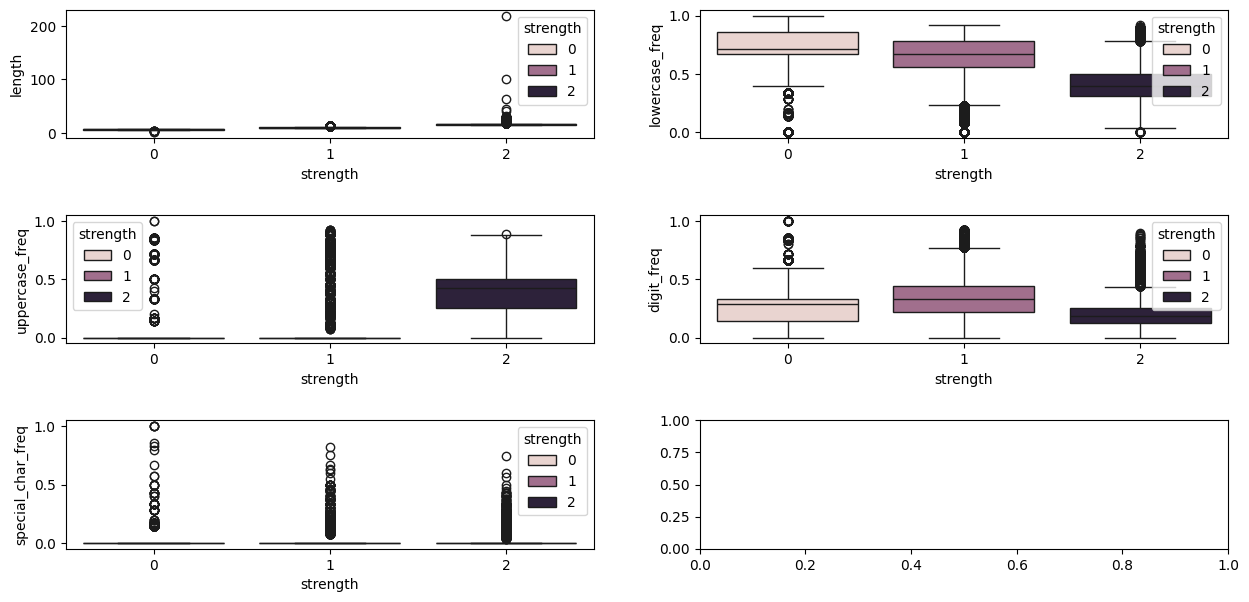

In [61]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [62]:
'''
Insights :
Regarding the insights we can say that:-



->> Higher Lowercase frequency is seen in low strength passwords.
    For higher strength passwords,Lowercase frequency can be high too but that is probably effect of length.


->> In digit_freq there is a split of majority poplutation of strength 1 and 2
    but for 0 and 1 strength , there is overlap so no too much to say there.
    But we can say a nicely propotioned password is good.


->> In upper_freq , there is a trend but not as strong as length or lower_freq..


->> Similar but stronger same trend as above in special_freq.

->> Higher strength passwords have more type breaks.


'''

'\nInsights :\nRegarding the insights we can say that:-\n\n\n\n->> Higher Lowercase frequency is seen in low strength passwords.\n    For higher strength passwords,Lowercase frequency can be high too but that is probably effect of length.\n\n\n->> In digit_freq there is a split of majority poplutation of strength 1 and 2\n    but for 0 and 1 strength , there is overlap so no too much to say there.\n    But we can say a nicely propotioned password is good.\n\n\n->> In upper_freq , there is a trend but not as strong as length or lower_freq..\n\n\n->> Similar but stronger same trend as above in special_freq.\n\n->> Higher strength passwords have more type breaks.\n\n\n'

# Feature Importance

In [63]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [64]:
def get_dist(data,feature):
  plt.figure(figsize=(10,8))
  plt.subplot(1,2,1)

  sns.violinplot(x = "strength",y=feature,data=data)
  plt.subplot(1,2,2)

  sns.distplot(data[data["strength"]==0][feature],color="red",label="0",hist =False)
  sns.distplot(data[data["strength"]==1][feature],color="blue",label="1",hist =False)
  sns.distplot(data[data["strength"]==2][feature],color="orange",label="o",hist =False)

In [65]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

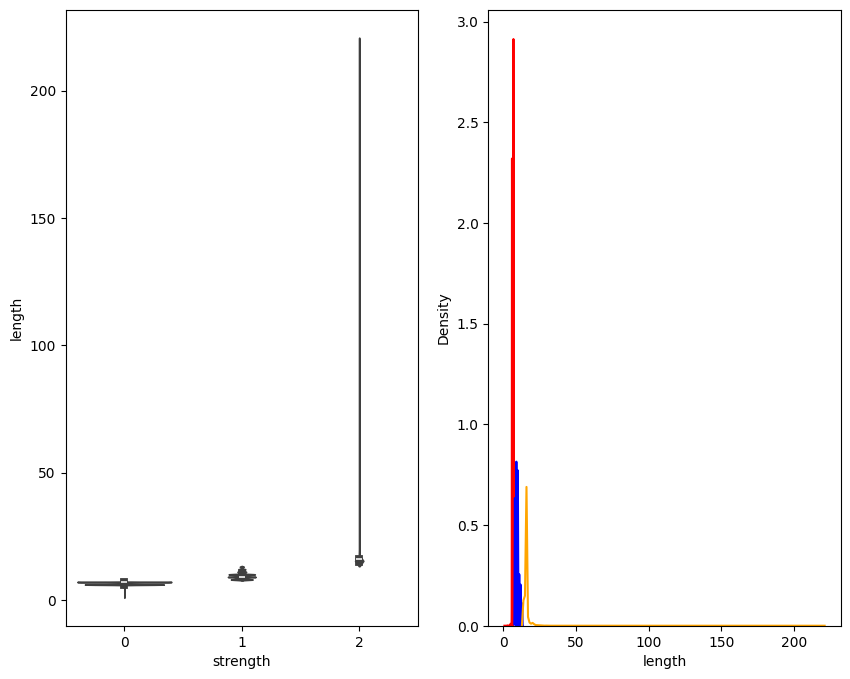

In [66]:
get_dist(data,"length")

In [67]:
### we have few overlappping region in distribution plot
### when class is 2 , we have higher value of 'length' than class 1 & class 0

## it means 'length' is a interesting feature as we have very less overlapping region

## similarly from violinplot ,we will say on account of less overlappping ,
## this feature 'length' is amazing & useful in determining the strength

In [68]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

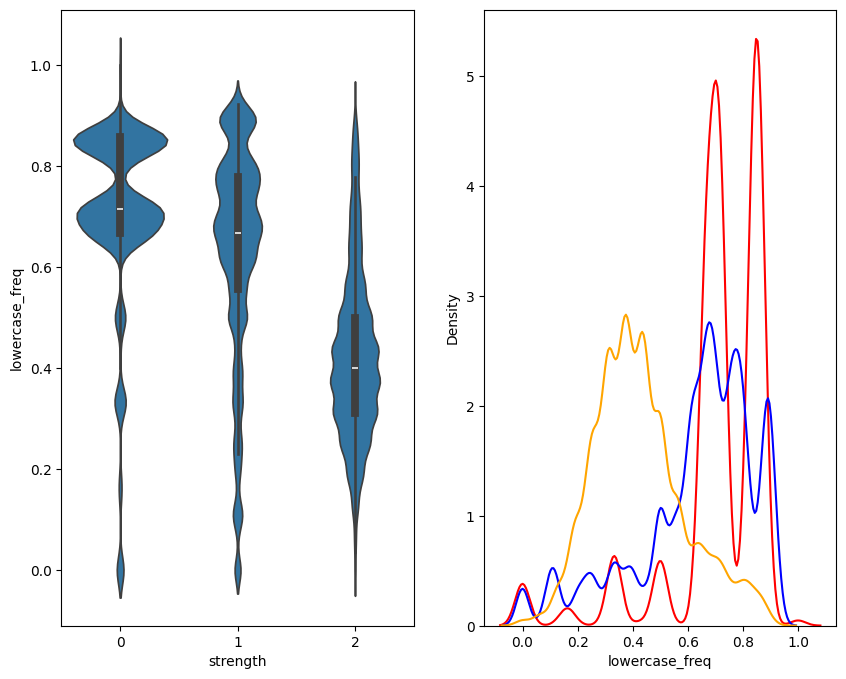

In [69]:
get_dist(data , 'lowercase_freq')

In [70]:
### we have some kind of overlappping region in distribution plot
### when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

## it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

## similarly from violinplot ,we will say on account of such overlappping ,
## when class is 2 we have less value of 'lower_freq' than class 1 & class 0
## this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

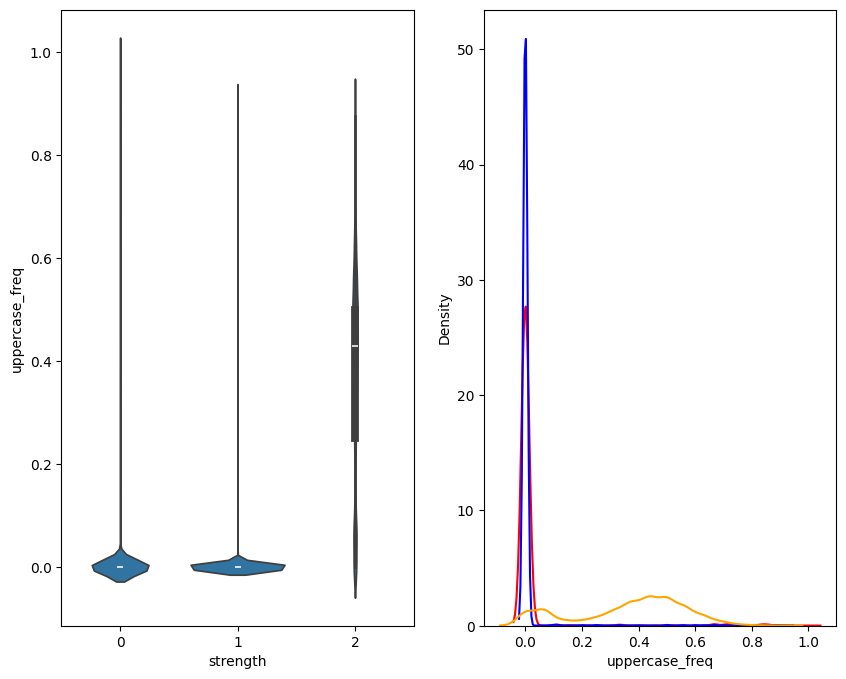

In [71]:
get_dist(data , 'uppercase_freq')

In [72]:
### we have quite high overlappping region in distribution plot

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping ,
## this feature 'lower_freq' is not a interesting feature in determining the strength

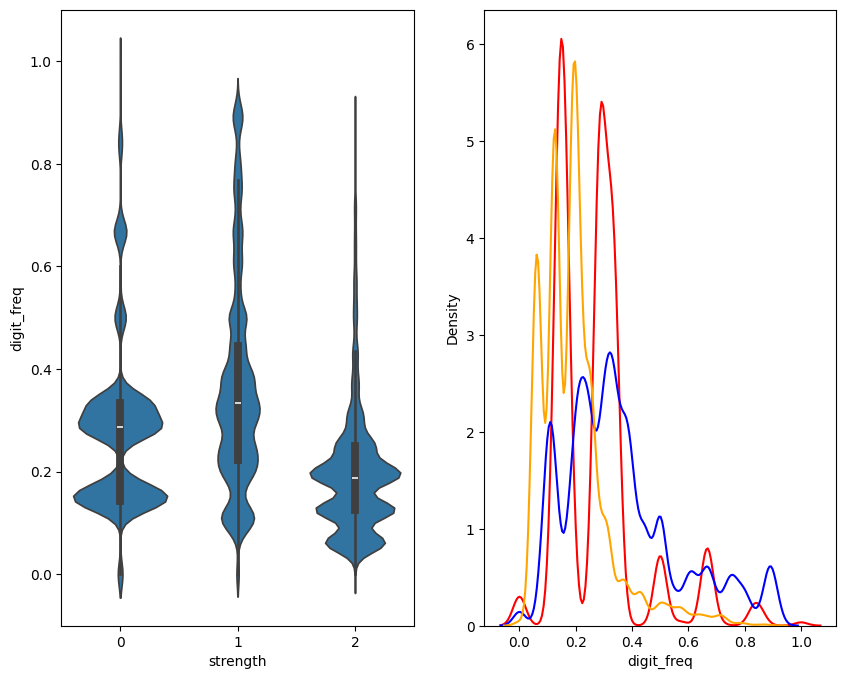

In [73]:
get_dist(data , 'digit_freq')

In [74]:
### we have quite high overlappping region in distribution plot

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping ,
## this feature 'lower_freq' is not a interesting feature in determining the strength

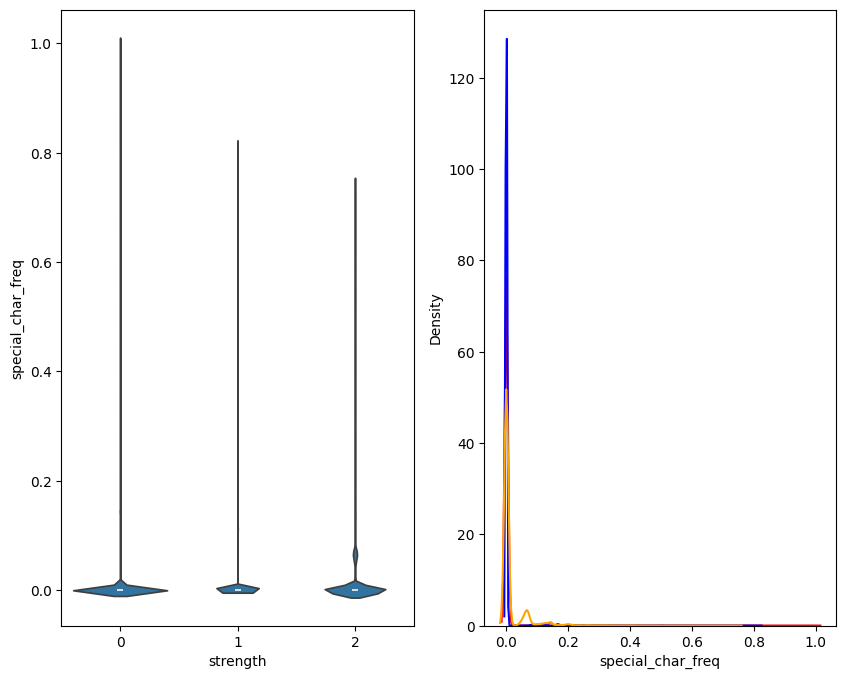

In [75]:
get_dist(data , 'special_char_freq')

In [76]:
'''

Key Insight : It ives us idea that length & lowercase freq are important features..


'''

'\n\nKey Insight : It ives us idea that length & lowercase freq are important features..\n\n\n'

#

# Apply TF-IDF on data

In [77]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [78]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel

In [79]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
57757,karlo1995,1,9,0.556,0.0,0.444,0.0
53919,bandara44,1,9,0.778,0.0,0.222,0.0
83347,liosay1979,1,10,0.600,0.0,0.400,0.0
92097,ioxzqbjp6,1,9,0.889,0.0,0.111,0.0
33530,010171out,1,9,0.333,0.0,0.667,0.0
...,...,...,...,...,...,...,...
24945,sniper81,1,8,0.750,0.0,0.250,0.0
74135,masacre88,1,9,0.778,0.0,0.222,0.0
11738,1386673aa,1,9,0.222,0.0,0.778,0.0
22887,9ed2eh0v,1,8,0.625,0.0,0.375,0.0


In [80]:
x = list(dataframe["password"])

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [82]:
#### as password is a series of chars , we have to calculate TF_IDF values of each char
#### Thats why we have to split our password as-->>
#### kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


### then we can compute Tf-Idf value of each character like Tf-IDF value of k , Tf-IDF value of z


In [83]:
vectorizer = TfidfVectorizer(analyzer="char")

In [84]:
X = vectorizer.fit_transform(x)

In [85]:
X.shape

(100000, 99)

In [86]:
X.toarray()             ### to get entire matrix of TF-IDF for 100000 passwords

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
X.toarray()[0]   ## TF-IDF scores of Ist row

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22915511, 0.        , 0.        , 0.        ,
       0.33193571, 0.        , 0.        , 0.        , 0.64078487,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.22068459, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.34172821, 0.31823264, 0.        ,
       0.        , 0.27116992, 0.        , 0.        , 0.29396661,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [88]:
dataframe["password"]

57757     karlo1995
53919     bandara44
83347    liosay1979
92097     ioxzqbjp6
33530     010171out
            ...    
24945      sniper81
74135     masacre88
11738     1386673aa
22887      9ed2eh0v
50449      weo52067
Name: password, Length: 100000, dtype: object

In [89]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## ie these are the various chars to which different TF-IDF values are assigned for 100000 passwords

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [90]:
 len(vectorizer.get_feature_names_out())

99

In [91]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [92]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning Algorithm

In [93]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [94]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [95]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [96]:
y = dataframe["strength"]

In [97]:
#Split data into train and test

In [98]:
#train---> To learn the relationship within data,
#test-->  To do predictions, and this testing data will be unseen to my model

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [101]:
X_train.shape

(80000, 101)

In [102]:
y_train.shape

(80000,)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes(Target feature is 3 here,strength:0,1,2)

clf = LogisticRegression(multi_class="multinomial")

In [105]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [106]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [107]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [108]:
from collections import Counter

In [109]:
Counter(y_pred)

Counter({1: 16846, 2: 1759, 0: 1395})

# Doing Prediction on sample data(user-entered input)

In [110]:
### as Logistic reg. model'clf' was trained on 101 features [99 from TF-IDF + 2 features from (total_length+lower_case_freq)]
## hence we need to convert any input(password) into (1,101) so that my model will accept this as Input

In [111]:
password = "%@123abcd"

In [112]:
sample_array = np.array([password])

In [113]:
sample_matrix = vectorizer.transform(sample_array)

In [114]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [115]:
sample_matrix.toarray().shape

### right now , array dim. is (1,99) so now we need to make it as : (1,101) so that my model will accept it as input.
### ie we need to add (length_of_password) & (total_lowercase_chars) in passsword

(1, 99)

In [116]:
password

'%@123abcd'

In [117]:
len(password)

9

In [123]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [119]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [120]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [124]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [125]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [126]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [127]:
clf.predict(new_matrix)

array([0])

In [128]:
## Automating it

In [129]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)

    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)

    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [130]:
predict()

Enter a password : dgygd7890^


'Password is weak'

In [132]:
predict()

Enter a password : 10jana7827


'Password is normal'

# Model Evaluation

In [133]:
#### check Accuracy of your model using confusion_matrix, accuracy_score

In [134]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [135]:
accuracy_score(y_test , y_pred)

0.8018

In [136]:
confusion_matrix(y_test , y_pred)

array([[  751,  2019,     0],
       [  585, 13845,   319],
       [   59,   982,  1440]])

In [137]:
### creating report of the model

print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.54      0.27      0.36      2770
           1       0.82      0.94      0.88     14749
           2       0.82      0.58      0.68      2481

    accuracy                           0.80     20000
   macro avg       0.73      0.60      0.64     20000
weighted avg       0.78      0.80      0.78     20000

